<a href="https://colab.research.google.com/github/ethan1213/sic_ai_2024/blob/main/DetectVoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y ffmpeg
!pip install pydub

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Importamos las librerías
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import gc
from google.colab import drive
from pydub import AudioSegment
from pydub.utils import mediainfo
import subprocess

In [ ]:
# Montar el Drive
drive.mount('/content/drive')

# Definir rutas de las carpetas en Google Drive
ruta_carpeta_IA = '/content/drive/MyDrive/Proyecto SIC/Voces IA'
ruta_carpeta_reales = '/content/drive/MyDrive/Proyecto SIC/Voces reales'
ruta_carpeta_combinadas = '/content/drive/MyDrive/Proyecto SIC/Voces combinadas/clips'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Función para convertir un archivo de audio en un espectrograma y guardarlo como imagen
def convertir_y_guardar_espectrograma(archivo_audio, nombre_salida, carpeta_espectro):
    # Cargar el audio en segmentos (máximo de 60 segundos)
    y, sr = librosa.load(archivo_audio, sr=None, duration=60)

    # Generar el espectrograma Mel con menor resolución
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)

    # Convertir el espectrograma a escala logarítmica
    S_db = librosa.power_to_db(S, ref=np.max)

    # Crear una imagen del espectrograma usando matplotlib
    plt.figure(figsize=(5, 2))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')

    # Eliminar los ejes y el marco
    plt.axis('off')

    # Guardar la imagen del espectrograma en la carpeta de salida sin ejes
    ruta_imagen = os.path.join(carpeta_espectro, nombre_salida)
    plt.tight_layout()
    plt.savefig(ruta_imagen, format='png', bbox_inches='tight', pad_inches=0)
    plt.close()

    # Liberar memoria
    gc.collect()

    return ruta_imagen

In [ ]:
def obtener_data_audio(ruta_archivo_1, ruta_salida, bandera):
    nombres_archivos = []
    duraciones = []
    frecuencias_muestreo = []
    rutas_imagenes_espectrograma = []
    etiquetas = []

    archivos_audio = [f for f in os.listdir(ruta_archivo_1) if f.endswith('.mp3') or f.endswith('.flac')]

    for archivo in archivos_audio:
        ruta_archivo = os.path.join(ruta_archivo_1, archivo)

        # Si el archivo es FLAC, conviértelo a WAV temporalmente

        if archivo.endswith('.flac'):
            ruta_archivo = convertir_flac_a_wav(ruta_archivo)
            if ruta_archivo is None:
                continue  # Salta al siguiente archivo si la conversión falla


        # Cargar el archivo de audio
        y, sr = librosa.load(ruta_archivo, sr=None, duration=60)

        # Almacenar la información del archivo
        nombres_archivos.append(archivo)
        duraciones.append(librosa.get_duration(y=y, sr=sr))
        frecuencias_muestreo.append(sr)

        # Generar y guardar el espectrograma como imagen
        print(f"Procesando archivo: {archivo}")
        nombre_salida_espectrograma = archivo.replace('.mp3', '.png').replace('.flac', '.png')
        ruta_imagen = convertir_y_guardar_espectrograma(ruta_archivo, nombre_salida_espectrograma, ruta_salida)
        rutas_imagenes_espectrograma.append(ruta_imagen)

        etiquetas.append(1 if bandera == 1 else 0)

    df = pd.DataFrame({
        'Nombre del archivo': nombres_archivos,
        'Duración (segundos)': duraciones,
        'Frecuencia de muestreo': frecuencias_muestreo,
        'Ruta espectrograma': rutas_imagenes_espectrograma,
        'Etiqueta': etiquetas
    })

    return df

In [ ]:
#vamos a crear todas las carpetas donde se van a guardar los espectogramas
carpeta_salida_espectrogramas_IA = '/content/drive/MyDrive/Proyecto SIC/espectrogramas_IA/'

# Crear la carpeta para guardar los espectrogramas si no existe
if not os.path.exists(carpeta_salida_espectrogramas_IA):
    os.makedirs(carpeta_salida_espectrogramas_IA)

carpeta_salida_espectrogramas_reales = '/content/drive/MyDrive/Proyecto SIC/espectrogramas_reales/'

# Crear la carpeta para guardar los espectrogramas si no existe
if not os.path.exists(carpeta_salida_espectrogramas_reales):
    os.makedirs(carpeta_salida_espectrogramas_reales)

carpeta_salida_espectrogramas_combinados = '/content/drive/MyDrive/Proyecto SIC/espectrogramas_combinados/'

# Crear la carpeta para guardar los espectrogramas si no existe
if not os.path.exists(carpeta_salida_espectrogramas_combinados):
    os.makedirs(carpeta_salida_espectrogramas_combinados)

In [ ]:
def convertir_flac_a_wav(archivo_flac):
    # Comprobar si el archivo existe y es un archivo FLAC
    if not archivo_flac.endswith('.flac'):
        print(f"El archivo {archivo_flac} no es un archivo FLAC.")
        return None

    # Crear la ruta del archivo WAV
    archivo_wav = archivo_flac.replace('.flac', '.wav')

    # Intentar convertir el archivo FLAC a WAV usando ffmpeg
    try:
        subprocess.run(['ffmpeg', '-i', archivo_flac, archivo_wav], check=True)
        print(f"Conversión exitosa: {archivo_flac} -> {archivo_wav}")
        return archivo_wav

    except subprocess.CalledProcessError as e:
        print(f"Error al convertir {archivo_flac} con ffmpeg: {e}")
        return None  # Devuelve None si la conversión falla

In [ ]:
df_IA = obtener_data_audio(ruta_carpeta_IA , carpeta_salida_espectrogramas_IA, 0 )

#mostramos el df_IA
df_IA.head()

Procesando archivo: Ibai's Voice(2).mp3
Procesando archivo: Ibai's Voice(3).mp3
Procesando archivo: Ibai's Voice(4).mp3
Procesando archivo: Ibai's Voice(5).mp3
Procesando archivo: Ibai's Voice(6).mp3
Procesando archivo: clip_1.mp3
Procesando archivo: clip_2.mp3
Procesando archivo: clip_3.mp3
Procesando archivo: clip_4.mp3
Procesando archivo: clip_5.mp3
Procesando archivo: clip_6.mp3
Procesando archivo: clip_7.mp3
Procesando archivo: clip_8.mp3
Procesando archivo: clip_9.mp3
Procesando archivo: clip_10.mp3
Procesando archivo: clip_11.mp3
Procesando archivo: clip_12.mp3
Procesando archivo: clip_13.mp3
Procesando archivo: clip_14.mp3
Procesando archivo: clip_15.mp3
Procesando archivo: clip_16.mp3
Procesando archivo: clip_17.mp3
Procesando archivo: clip_18.mp3
Procesando archivo: clip_19.mp3
Procesando archivo: clip_20.mp3
Procesando archivo: clip_21.mp3
Procesando archivo: clip_22.mp3
Procesando archivo: clip_23.mp3
Procesando archivo: clip_24.mp3
Procesando archivo: clip_25.mp3
Procesand

,Nombre del archivo,Duración (segundos),Frecuencia de muestreo,Ruta espectrograma,Etiqueta
0,Ibai's Voice(2).mp3,53.935000,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0
1,Ibai's Voice(3).mp3,13.260000,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0
2,Ibai's Voice(4).mp3,12.460000,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0
3,Ibai's Voice(5).mp3,14.885042,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0
4,Ibai's Voice(6).mp3,12.060000,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0


In [ ]:
#ahora vamos con las voces reales
df_reales = obtener_data_audio(ruta_carpeta_reales, carpeta_salida_espectrogramas_reales, 1)

#mostramos el df_reales
df_reales.head()

Procesando archivo: Ibai_real.mp3
Procesando archivo: clip_2.mp3
Procesando archivo: clip_1.mp3
Procesando archivo: clip_3.mp3
Procesando archivo: clip_4.mp3
Procesando archivo: clip_5.mp3
Procesando archivo: clip_6.mp3
Procesando archivo: clip_8.mp3
Procesando archivo: clip_7.mp3
Procesando archivo: clip_9.mp3
Procesando archivo: clip_10.mp3
Procesando archivo: clip_11.mp3
Procesando archivo: clip_12.mp3
Procesando archivo: clip_14.mp3
Procesando archivo: clip_13.mp3
Procesando archivo: clip_16.mp3
Procesando archivo: clip_15.mp3
Procesando archivo: clip_18.mp3
Procesando archivo: clip_17.mp3
Procesando archivo: clip_19.mp3
Procesando archivo: clip_20.mp3
Procesando archivo: clip_21.mp3
Procesando archivo: clip_23.mp3
Procesando archivo: clip_22.mp3
Procesando archivo: clip_25.mp3
Procesando archivo: clip_24.mp3
Procesando archivo: clip_29.mp3
Procesando archivo: clip_26.mp3
Procesando archivo: clip_27.mp3
Procesando archivo: clip_28.mp3
Procesando archivo: clip_31.mp3
Procesando arch

,Nombre del archivo,Duración (segundos),Frecuencia de muestreo,Ruta espectrograma,Etiqueta
0,Ibai_real.mp3,27.167347,44100,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1
1,clip_2.mp3,10.000000,48000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1
2,clip_1.mp3,10.000000,48000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1
3,clip_3.mp3,10.000000,48000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1
4,clip_4.mp3,10.000000,48000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1


In [ ]:
#por si acaso instalamos tenserflow
!pip install tensorflow

In [ ]:
#empezamos a armar la red CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
def cargar_espectrogramas(df):
    # Tamaño de las imágenes de espectrograma
    img_width, img_height = 128, 128

    # Inicializar listas para las imágenes y las etiquetas
    X = []
    y = []

    for index, row in df.iterrows():
        img_path = row['Ruta espectrograma']
        etiqueta = row['Etiqueta']

        # Cargar la imagen y redimensionarla
        img = load_img(img_path, target_size=(img_width, img_height), color_mode="grayscale")
        img_array = img_to_array(img)

        # Normalizar los valores de la imagen entre 0 y 1
        img_array /= 255.0

        X.append(img_array)
        y.append(etiqueta)

    return np.array(X), np.array(y)

In [ ]:
# Asegúrate de que el DataFrame incluya las rutas de los archivos
rutas_espectrogramas_IA = df_IA["Ruta espectrograma"].values
rutas_espectrogramas_reales = df_reales["Ruta espectrograma"].values

# Unir las rutas de espectrogramas IA y reales
rutas_espectrogramas = np.concatenate((rutas_espectrogramas_IA, rutas_espectrogramas_reales), axis=0)

# Cargar los espectrogramas como antes
X_IA, y_IA = cargar_espectrogramas(df_IA)
X_reales, y_reales = cargar_espectrogramas(df_reales)

# Unir los datasets IA y reales
X = np.concatenate((X_IA, X_reales), axis=0)
y = np.concatenate((y_IA, y_reales), axis=0)

# Convertir etiquetas a formato categórico (one-hot encoding)
y = to_categorical(y, num_classes=2)

# Dividir en conjuntos de entrenamiento y prueba, manteniendo las rutas de los archivos en X_test
X_train, X_test, y_train, y_test, rutas_train, rutas_test = train_test_split(
    X, y, rutas_espectrogramas, test_size=0.2, random_state=42
)

In [ ]:
# Crear la arquitectura del modelo CNN
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Tercera capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanamiento
model.add(Flatten())

# Capa densa completamente conectada
model.add(Dense(128, activation='relu'))

# Capa de salida (2 clases: IA o Real)
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 284ms/step - accuracy: 0.6089 - loss: 0.6593 - val_accuracy: 0.7717 - val_loss: 0.3880
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9474 - loss: 0.1866 - val_accuracy: 0.9674 - val_loss: 0.0909
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9854 - loss: 0.0522 - val_accuracy: 0.9783 - val_loss: 0.1562
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9909 - loss: 0.0238 - val_accuracy: 0.9783 - val_loss: 0.1062
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9990 - loss: 0.0071 - val_accuracy: 0.9783 - val_loss: 0.0926
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9837 - val_loss: 0.0814
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9837 - val_loss: 0.0842
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9986 - loss: 0.0020 - val_accuracy: 0.9837 

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9861 - loss: 0.1347     
Precisión en el conjunto de prueba: 98.37%


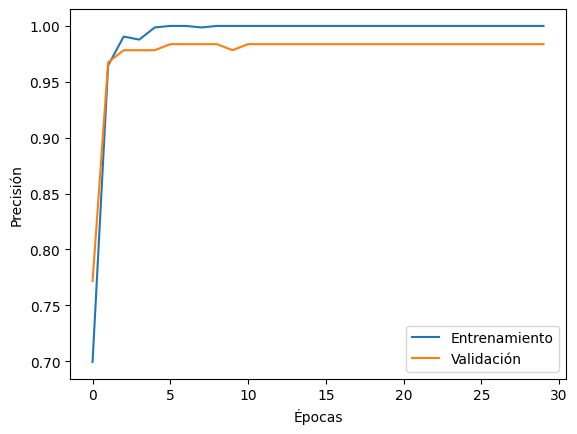

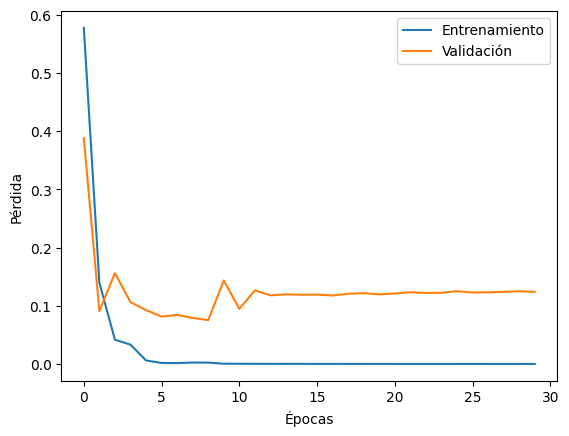

In [ ]:
# Gráfica de la precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

# Gráfica de la pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Realizar predicciones con el conjunto de prueba
predicciones = model.predict(X_test)

# Convertir las predicciones de probabilidades a etiquetas (0 o 1)
predicciones_clases = np.argmax(predicciones, axis=1)

# Mostrar las primeras 50 predicciones con rutas y niveles de confianza
for i in range(50):
    ruta_archivo = rutas_test[i]
    prediccion = predicciones_clases[i]
    confianza = predicciones[i][prediccion] * 100

    # Mostrar ubicación, predicción en términos de clase y confianza
    print(f"Ubicación en Drive: {ruta_archivo}")
    print(f"Predicción del modelo: Clase {prediccion} ({confianza:.2f}% de confianza)\n")

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc * 100:.2f}%")




6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_IA/clip_68.png
Predicción del modelo: Clase 0 (100.00% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_IA/clip_116.png
Predicción del modelo: Clase 0 (100.00% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_IA/clip_68f99085-c752-4422-902b-d11942671dcc.png
Predicción del modelo: Clase 0 (100.00% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_IA/clip_2f9d085d-e66c-46ba-b8a1-35b4aa5e6db6.png
Predicción del modelo: Clase 0 (100.00% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_reales/clip_382.png
Predicción del modelo: Clase 1 (99.62% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_reales/clip_205.png
Predicción del modelo: Clase 1 (99.98% de confianza)

Ubicación en Drive: /content/drive/MyDr